In [2]:
import numpy
import matplotlib.pyplot as plt 
import pandas
import mglearn
import scipy

import sklearn
import sklearn.ensemble              # import seperatley otherwise sub module won't be imported
import sklearn.neural_network        # import seperatley otherwise sub module won't be imported
from sklearn.cluster import KMeans
import sklearn.feature_selection

import graphviz
import mpl_toolkits.mplot3d as plt3dd

# Automatic feature selections

Requires supervisesd learning

## Univariate statistics

In univariate statistics, we compute whether there is a statistically significant relationship between each feature and the target.Then the features that are related with the highest confidence are selected. In the case of classification, this is also known as analysis of variance (ANOVA). A key property of these tests is that they are univariate, meaning that they only consider each feature individually.

Univariate tests are often very fast to compute, and don’t require building a model. On the other hand, they are completely independent of the model that you might want to apply after the feature selection.

Cancer data.shape: (569, 30)
X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)

Selected features [ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


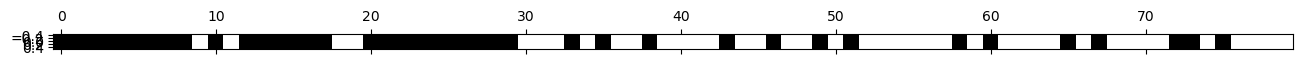

In [3]:
cancer = sklearn.datasets.load_breast_cancer();


# get deterministic random numbers
rng = numpy.random.RandomState(42);
noise = rng.normal(size=(len(cancer.data),50));

X_w_noise = numpy.hstack([cancer.data, noise]);
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5);

# use f_classif (the default) and SelectPercentile to select 50% of features
select = sklearn.feature_selection.SelectPercentile(percentile=50);
select.fit(X_train, y_train);

# transform training set
X_train_selected = select.transform(X_train);

print("Cancer data.shape: {}".format(cancer.data.shape));
print("X_train.shape: {}".format(X_train.shape));
print("X_train_selected.shape: {}".format(X_train_selected.shape));

mask = select.get_support();
print("\nSelected features {}".format(select.get_support()));
plt.matshow(mask.reshape(1,-1), cmap='gray_r');

In [4]:
X_test_selected = select.transform(X_test);

lr = sklearn.linear_model.LogisticRegression(max_iter=1000);
lr.fit(X_train, y_train);
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)));
lr.fit(X_train_selected, y_train);
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)));

Score with all features: 0.937
Score with only selected features: 0.940


C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

## Model-based feature selection

The feature selection model needs to provide some measure of importance for each feature, so that they can be ranked by this measure. Decision trees and decision tree–based models provide a feature_importances.

X_train.shape: (284, 80)
X_train_l1.shape: (284, 17)


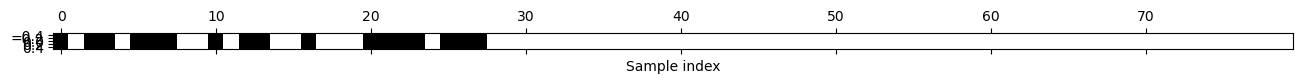

In [55]:
select = sklearn.feature_selection.SelectFromModel(sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42),
                                                  threshold=None);
select.fit(X_train, y_train);
X_train_l1 = select.transform(X_train);

print("X_train.shape: {}".format(X_train.shape));
print("X_train_l1.shape: {}".format(X_train_l1.shape));

mask = select.get_support();
plt.matshow(mask.reshape(1, -1), cmap='gray_r');
plt.xlabel("Sample index");

In [56]:
X_test_l1 = select.transform(X_test);
score = sklearn.linear_model.LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test);
print("Test score: {:4.2f}".format(score*100))

Test score: 95.44


C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Iterative feature selection

There are two basic methods: starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached. Because a series of models are built, these methods are much more computationally expensive than the methods we discussed previously. One particular method of this kind is recursive feature elimination (RFE), which starts with all features, builds a model, and discards the least important feature according to the model. Then a new model is built using all but the discarded feature, and so on until only a prespecified number of features are left. For this to work, the model used for selection needs to provide some way to determine feature importance, as was the case for the model-based selection.

In [60]:
select = sklearn.feature_selection.RFE(sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42),
                                      n_features_to_select=40);
select.fit(X_train, y_train);

LogReg score: 92.98 %
Select score: 95.09 %


C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


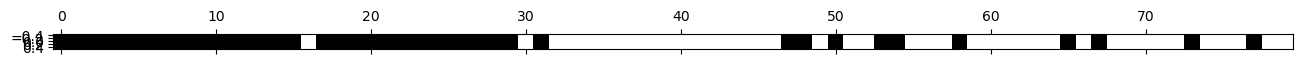

In [62]:

mask = select.get_support();
plt.matshow(mask.reshape(1,-1), cmap='gray_r');

X_train_rfe = select.transform(X_train);
X_test_rfe = select.transform(X_test);

score = sklearn.linear_model.LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test);
print("LogReg score: {:4.2f} %".format(score*100));
print("Select score: {:4.2f} %".format(select.score(X_test, y_test)*100));